(primeros_pasos)=
# Introducción.

En este apartado vamos a proceder a exponer diversos ejemplos fáciles de implementar, con la finalidad que el usuario se vaya familiarizando con las ideas que subyacen a este tipo de técnica de computación cuántica.

En este apartado vamoa a aprender a construir modelos de tipo [QUBO](modelo_qubo) y de tipo [ISING](modelo_ising), así como su solución utilizando diferentes samplers.


Recordemos que un **modelo de tipo ISING** va tratar las variables como binarias pero que pueden tomar los valores -1 y +1. Entonces utilizando este modelo la función objetivo se va a definir de la siguiente manera:

$$
E=-\sum_{i}h_{i}S_{i}+\sum_{i,j}J_{ij}S_{i}S_{j}\qquad donde\:S_{i}\in\{-1,+1\}
$$

La variable se representa en este modelo por S ya que es la inicial de *Spin*.Los valores de h's y J's son constantes para ajustar por el modelo, una h para cada Spin y una J para cada interacción de los pares de Spines.

El **modelo  de tipo QUBO**, se describe de la siguiente manera:

$$
Obj(c,a_{i},b_{ij},q_{i})=c+\sum_{i}a_{i}q_{i}+\sum_{i<j}b_{ij}q_{i}q_{j}
$$

En este caso las variables q's son variables de tipo qubit que valen 0 ó 1 en lugar de -1 ó 1

Para convertir una variable QUBO en Ising se utiliza la siguiente transformación:

$$
q_i=\frac{1+S_i}{2}
$$

## Interactuando con un sampler o un solver.
```{index} solver
```

Para hallar el estado de energía mínima para un QM (la asignación de valores a  variables que nos da el 
valor mínimo de energía para nuestro QM), e sistema l Ocean SDK proporciona** muestreadores y solucionadore**s. Un solucionado (solver)r e 
un recurso que ejecuta un problema. Los muestreado (sampler)res son procesos que ejecutan un problema muchas veces para obte er
una colección de muestras, cada una de las cuales es una posible solución a nuestro problema. Por comod dad
nos referiremos generalmente a los muestreadores de Ocean como un todo, para incluir también a los solucionadorEl sistema Ocean SDK proporciona una variedad de diferentes muestreadores que podemos utilizar para examinar nuestro problema. Estos van desde el D-Wave QPU (DWaveSampler) a algoritmos clásicos como la búsqueda tabu 
(TabuSampler) e incluso herramientas híbridas (LeapHybridSampler). Para más información sobre los muestreadore 
en la documentación completa de Oce.

Los solvers en Ocean SDK se puede dividir en los siguientes apartados:
```{index} Classical Solvers, Hybrid Solvers, Quantum Solvers, Solvers, DWaveSampler,EmbeddingComposite
```
* <a href="https://docs.ocean.dwavesys.com/en/stable/overview/cpu.html" target="_blank"> Classical Solvers </a>. Se puede utilizar un solucionador clásico mientras se desarrolla un código o en una versión pequeña de un problema para verificar el código.Con este tipo de Solvers, la solución se obtiene utilizando el equipo propio con el que trabaja el investigador.

* <a href="https://docs.ocean.dwavesys.com/en/stable/overview/hybrid.html" target="_blank"> Solvers Híbridos </a>. Este tipo de solvers utiliza recursos clásicos y cuánticos para resolver los problemas.

* <a href="https://docs.ocean.dwavesys.com/en/stable/overview/qpu.html" target="_blank">  Solvers cuánticos </a>.Este sistema utiliza sólo medios cuánticos para resolver los problemas planteados.Este solver es denominado <a href= "https://docs.ocean.dwavesys.com/en/stable/docs_system/reference/samplers.html#dwave.system.samplers.DWaveSampler" target="_blank"> DWaveSampler </a> que normalmente es utilizado junto a <a href="https://docs.ocean.dwavesys.com/en/stable/docs_system/reference/composites.html#dwave.system.composites.EmbeddingComposite" target="_blank"> EmbeddingComposite </a>.

Vamos a comenzar en esta sección a crear con diversos métodos un modelo BQM o ISING y como se resuelve utiliozando diferentes solvers. Comenzamos con el solver más sencillo, el denominado <a href="https://docs.ocean.dwavesys.com/en/stable/docs_dimod/reference/sampler_composites/samplers.html#id10" target="_blank"> ExactSolver </a> del paquete dimod.

```{index} BinaryQuadraticModel
```
Importaremos primero la clase *BinaryQuadraticModel()*. annslator

In [1]:
from dimod import BinaryQuadraticModel

También se puede importar de la siguiente manera

In [2]:
from dimod import BQM

En principio hay que tener en cuenta que todos los samplers de Ocean heredan de la clase abstracta *Sampler* , para ver el contenido de esta clase, se pueden utilizar las siguientes instrucciones.

In [3]:
from dimod import Sampler

Sampler?

Init signature: Sampler()
Docstring:     
Abstract base class for dimod samplers.

Provides all methods :meth:`~.Sampler.sample`, :meth:`~.Sampler.sample_ising`,
:meth:`~.Sampler.sample_qubo` assuming at least one is implemented.

Also includes utility method :meth:`~.Sampler.remove_unknown_kwargs`,
which may be used in sample methods to handle unknown kwargs.
File:           c:\users\francisco\desktop\dwaveocean\ocean\lib\site-packages\dimod\core\sampler.py
Type:           SamplerABCMeta
Subclasses:     ComposedSampler, StructureComposite, ExactSolver, IdentitySampler, NullSampler, RandomSampler, SimulatedAnnealingSampler

Diferentes Samplers que podemos utilizar los podemos ver en el siguiente cuadro:

![Samplers Ocean](../img/samplers.PNG)

Vamos a mostrar a continuación código para generar un problema de tipo ISING, que posteriormente resolveremos con diferentes solvers.

Procedemos a continuación a crear el modelo ISING

In [10]:
from dimod import BinaryQuadraticModel, to_networkx_graph
bqm = BinaryQuadraticModel('SPIN')
bqm.add_variable(0, -1)
bqm.add_variable(1, -1)
bqm.add_variable(4, -1)
bqm.add_variable(5, -1)
# bqm.add_variable(6,-1) # lo añadí yo de prueba
bqm.add_interaction(0, 4, 1.0)
bqm.add_interaction(0, 5, 1.0)
bqm.add_interaction(1, 4, 1.0)
bqm.add_interaction(1, 5, 1.0)
# bqm.add_interaction(0, 1, 1.0) # lo añadí so de prueba


El modelo anterior, representado con uan formulación matemática, sería el siguiente:

$$-1\cdot x_{0}-1\cdot x_{1}-1\cdot x_{4}-1\cdot x_{5}+1\cdot x_{0}\cdot x_{4}+1\cdot x_{0}\cdot x_{5}+1\cdot x_{1}\cdot x_{4}+1\cdot x_{1}\cdot x_{4}$$
Y además el modelo sería de tipo SPIN, es decir que las variables, sólo podrían tomar valores de 1 ó -1.

```{index} to_networkx_graph
```


Un modelo BQM, se representa en los ordenadores de D_Wave mediante un grafo, dondelos nodos son los coeficientes lineales de la ecuación anterior, y los arcos soerían los coeficientes de los términos cuadráticos. Vamos a representar mediante un grafo el modelo crado anteriormenmte: 

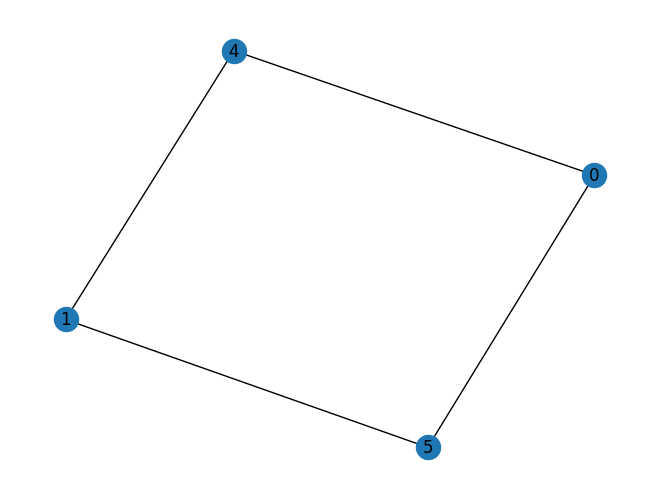

In [11]:

import networkx as nx
red = to_networkx_graph(bqm)
nx.draw(red, with_labels = True)


Veamos que efectivamente los arcos son los términos cuadráticos de la ecuación

In [9]:
red.edges().data()

EdgeDataView([(0, 4, {'bias': 1.0}), (0, 5, {'bias': 1.0}), (1, 4, {'bias': 1.0}), (1, 5, {'bias': 1.0})])

Veamos a continuación el modelo que realmente se ha construido:

In [5]:
bqm

BinaryQuadraticModel({0: -1.0, 1: -1.0, 4: -1.0, 5: -1.0}, {(4, 0): 1.0, (4, 1): 1.0, (5, 0): 1.0, (5, 1): 1.0}, 0.0, 'SPIN')

In [12]:
# Estos serían los términos lineales
bqm.linear

{0: -1.0, 1: -1.0, 4: -1.0, 5: -1.0}

In [13]:
# estos los términos cuadráticos
bqm.quadratic

{(4, 0): 1.0, (4, 1): 1.0, (5, 0): 1.0, (5, 1): 1.0}

Vamos a resolver el problema anterior, con el Solver *ExactSolver*.

In [14]:
from dimod import ExactSolver
# Creamos una instancia de este Solver
solver = ExactSolver()
response = solver.sample(bqm)
# Sólo sacamos las primeras 10 soluciones (ordenadas de menos a más energía )
print(response.truncate(10))

   0  1  4  5 energy num_oc.
0 +1 +1 -1 -1   -4.0       1
1 -1 -1 +1 +1   -4.0       1
2 +1 +1 +1 -1   -2.0       1
3 +1 -1 +1 +1   -2.0       1
4 -1 +1 +1 +1   -2.0       1
5 +1 +1 -1 +1   -2.0       1
6 -1 +1 +1 -1    0.0       1
7 +1 -1 +1 -1    0.0       1
8 +1 +1 +1 +1    0.0       1
9 -1 +1 -1 +1    0.0       1
['SPIN', 10 rows, 10 samples, 4 variables]


Como el modelo se le ha declarado de tipo SPIN los únicos valores que toman las variables son 1 y -1 y un mínimo de la función antyerior, lo podemos encontrar con la primera solución indicada que es la que tiene menor energía, aunque también podría servir la siguiente, la que ocupa la segunda línea de la solución.

## DWave_neal.
```{index} SimulatedAnnealingSampler,LeapHybridSampler,DWaveSampler
```
Es de advertir que este módulo está *deprecated* desde dwave-ocean-sdk.6.1.0 en favor del módulo dwave_samplers, y será eliminado en la versión dwave-ocean-sdk.8.0.0.

In [16]:
from neal import SimulatedAnnealingSampler 

sampler = SimulatedAnnealingSampler()

response = sampler.sample(bqm, num_reads=10,
                          num_sweeps=1000,
                          initial_states=None,
                          beta_range=[10, 100])
print(response)

   0  1  4  5 energy num_oc.
0 -1 -1 +1 +1   -4.0       1
1 +1 +1 -1 -1   -4.0       1
2 +1 +1 -1 -1   -4.0       1
3 +1 +1 -1 -1   -4.0       1
4 -1 -1 +1 +1   -4.0       1
5 +1 +1 -1 -1   -4.0       1
6 +1 +1 -1 -1   -4.0       1
7 +1 +1 -1 -1   -4.0       1
8 +1 +1 -1 -1   -4.0       1
9 +1 +1 -1 -1   -4.0       1
['SPIN', 10 rows, 10 samples, 4 variables]


Utilizamos a continuación un solvers completamente cuántico, nos referimos a *DWaveSampler*. Veamos un ejemplo

In [ ]:
from dwave.system import DWaveSampler

sampler = DWaveSampler(solver=dict(topology__type='chimera'))

response = sampler.sample(
    bqm, num_reads=10,
    annealing_time=10,
    auto_scale=False,
    answer_mode='raw',
    label='Prueba_DWaveSampler'
    )
print(response)

Por último usamos *LeapHybridSampler*, un solver híbrido muy flexibles y utilizado

In [ ]:
from dwave.system import LeapHybridSampler

sampler = LeapHybridSampler()
print("Propiedades de este Sampler:\n")
print(sampler.properties)

response = sampler.sample(
    bqm, time_limit=3,
    label = "Prueba con LeapHybridSampler"
    )
print("\nla respuesta es la siguiente.\n")
print(response)

## Otro ejemplo.

Con el fin de afianzar estos conceptos, fáciles pero muy importante de dominar pues son los pilares de estos métodos de optimización, a continuación procedemos a resolver otro problema similar al anterior. Implementamos el código para el problema

In [17]:
bqm = BinaryQuadraticModel('SPIN')
bqm.add_variable('x',1)
bqm.add_variable('y',1)
bqm.add_variable('z',1)
bqm.add_interaction('x','y',-2)
bqm.add_interaction('x','z',-2)
bqm.add_interaction('y','z',-2)

La función objetivo en este caso sería la siguiente:

$$H = x + y + z - 2xy - 2xz - 2yz$$

In [18]:
# Veamos el modelo
bqm

BinaryQuadraticModel({'x': 1.0, 'y': 1.0, 'z': 1.0}, {('y', 'x'): -2.0, ('z', 'x'): -2.0, ('z', 'y'): -2.0}, 0.0, 'SPIN')

El anterior modelo también se puede construir, desde un diccionario de python de la siguiente manera

In [25]:
# el diccionario h contendrá los términos lineales
h1={}
# El diccionario j contendra los terminos cuadráticos
j1={}

# Ahora definimos los términos lineales
h1['x']=1
h1['y']=1
h1['z']=1

#Definimos los términos cuadráticos

j1['x','y'] =-2
j1['x','z'] = -2
j1['y','z'] = -2

model = BinaryQuadraticModel.from_ising(h=h1,J=j1)
model

BinaryQuadraticModel({'x': 1.0, 'y': 1.0, 'z': 1.0}, {('y', 'x'): -2.0, ('z', 'x'): -2.0, ('z', 'y'): -2.0}, 0.0, 'SPIN')

Como podemos observar con los dos procedimientos obtenemos el mismo modelo. Veamos algunas de las características del modelo construido:

In [26]:
model.vartype

<Vartype.SPIN: frozenset({1, -1})>

In [27]:
model.variables

Variables(['x', 'y', 'z'])

Resolvemos con ExactSolver

In [28]:
from dimod import ExactSolver

solver = ExactSolver()
response = solver.sample(bqm)
print(response.truncate(10))

   x  y  z energy num_oc.
0 -1 -1 -1   -9.0       1
1 +1 +1 +1   -3.0       1
2 +1 -1 -1    1.0       1
3 -1 +1 -1    1.0       1
4 -1 -1 +1    1.0       1
5 +1 +1 -1    3.0       1
6 -1 +1 +1    3.0       1
7 +1 -1 +1    3.0       1
['SPIN', 8 rows, 8 samples, 3 variables]


In [29]:
type(response)

dimod.sampleset.SampleSet

Como podemos observar el objeto que se nos devuelve es de tipo SampleSet y su documentación <a href="https://docs.ocean.dwavesys.com/en/stable/docs_dimod/reference/sampleset.html" target="_blank"> la podemos ver en este enlace </a>.

In [30]:
response.data

<bound method SampleSet.data of SampleSet(rec.array([([-1, -1, -1], -9., 1), ([ 1, -1, -1],  1., 1),
           ([ 1,  1, -1],  3., 1), ([-1,  1, -1],  1., 1),
           ([-1,  1,  1],  3., 1), ([ 1,  1,  1], -3., 1),
           ([ 1, -1,  1],  3., 1), ([-1, -1,  1],  1., 1)],
          dtype=[('sample', 'i1', (3,)), ('energy', '<f8'), ('num_occurrences', '<i4')]), Variables(['x', 'y', 'z']), {}, 'SPIN')>

Podemos quedarnos con parte de los datos de la respuesta de la siguiente manera:

In [31]:
for sample, energy in response.data(['sample','energy']):
    print(sample, energy)
print("___________________")


for sample, num_oc in response.data(['sample','num_occurrences']):
    print(sample, num_oc)

{'x': -1, 'y': -1, 'z': -1} -9.0
{'x': 1, 'y': 1, 'z': 1} -3.0
{'x': 1, 'y': -1, 'z': -1} 1.0
{'x': -1, 'y': 1, 'z': -1} 1.0
{'x': -1, 'y': -1, 'z': 1} 1.0
{'x': 1, 'y': 1, 'z': -1} 3.0
{'x': -1, 'y': 1, 'z': 1} 3.0
{'x': 1, 'y': -1, 'z': 1} 3.0
___________________
{'x': -1, 'y': -1, 'z': -1} 1
{'x': 1, 'y': 1, 'z': 1} 1
{'x': 1, 'y': -1, 'z': -1} 1
{'x': -1, 'y': 1, 'z': -1} 1
{'x': -1, 'y': -1, 'z': 1} 1
{'x': 1, 'y': 1, 'z': -1} 1
{'x': -1, 'y': 1, 'z': 1} 1
{'x': 1, 'y': -1, 'z': 1} 1


In [32]:
# Sacamos la primera solución
print(response.first)

Sample(sample={'x': -1, 'y': -1, 'z': -1}, energy=-9.0, num_occurrences=1)


## Utilización de FixedVariableComposite.
```{index} FixedVariableComposite
```
En ocasiones quizá pueda ser aconsejable fijar el valor de una variables al resolver problemas de optimización. Para conseguir esto Ocean SDK pone a nuestra disposición el clase <a href="https://docs.ocean.dwavesys.com/en/stable/docs_preprocessing/reference/composites.html" target='_blank'> FixedVariableComposite </a>.

Para ver cómo podemos utilzar esto, vamos a añadir al modelo anterior una nueva variable denominada w con un *bias* igual a -1. Esta variable no va a estar conectada a ninguna otra variable y la vamos a fijar con un valor igual a 1.

Todo esto lo hacemos con el siguiente código


In [33]:
# He importado FixVariablesComposite porque FixedVariableComposite estaba decrepated
from dwave.preprocessing.composites import FixVariablesComposite
#bqm.add_variable('w',-1)
composite_sampler = FixVariablesComposite(solver)
# añadimos la variable w al modelo, con un valor de bias de -1
bqm.add_variable('w',-1) 
# Ahora fijo el valor de la variable w a 1
respuesta = composite_sampler.sample(bqm,fixed_variables={'w':1})
print(respuesta)

   w  x  y  z energy num_oc.
0 +1 -1 -1 -1  -10.0       1
5 +1 +1 +1 +1   -4.0       1
1 +1 +1 -1 -1    0.0       1
3 +1 -1 +1 -1    0.0       1
7 +1 -1 -1 +1    0.0       1
2 +1 +1 +1 -1    2.0       1
4 +1 -1 +1 +1    2.0       1
6 +1 +1 -1 +1    2.0       1
['SPIN', 8 rows, 8 samples, 4 variables]


## Convertir un modelo QUBO en ISING.

En el siguiente ejemplo, vamos a ver como pasar de un modelo tipo QUBO a otro ISING

In [34]:
# Importamos los paquetes necesario
from dwave.system import EmbeddingComposite, DWaveSampler
from dimod import BinaryQuadraticModel

# Definimos el problema mediante un diccionario
Q = {('B','B'): 1,
    ('K','K'): 1,
    ('A','C'): 2,
    ('A','K'): -2,
    ('B','C'): -2}

# Generamos el modelo QUBO
bqm = BinaryQuadraticModel.from_qubo(Q)

bqm

BinaryQuadraticModel({'B': 1.0, 'K': 1.0, 'A': 0.0, 'C': 0.0}, {('A', 'K'): -2.0, ('C', 'B'): -2.0, ('C', 'A'): 2.0}, 0.0, 'BINARY')

Ahora cambiamos el tipo de modelo

In [35]:
# Convertimos el bqm to a un modelo Ising
ising_model = bqm.to_ising()
ising_model

({'B': 0.0, 'K': 0.0, 'A': 0.0, 'C': 0.0},
 {('A', 'K'): -0.5, ('C', 'B'): -0.5, ('C', 'A'): 0.5},
 0.5)

Veamos la diferentes partes que se han generado

In [36]:
ising_model[0]

{'B': 0.0, 'K': 0.0, 'A': 0.0, 'C': 0.0}

In [37]:
ising_model[1]

{('A', 'K'): -0.5, ('C', 'B'): -0.5, ('C', 'A'): 0.5}

In [ ]:

# Definimos el Sampler a utilizar en el problema
sampler = EmbeddingComposite(DWaveSampler())

# Ejecutamos el Sampler definido antes e imprimimos el resultado
sampleset = sampler.sample_ising(
                h = ising_model[0],
                J = ising_model[1],
                num_reads = 10,
                label='Example - Simple Ocean Programs: Conversion')

print(sampleset)

Otra manera de hacer lo anterior sería mediante el siguiente formato de código

In [ ]:
from dwave.system import EmbeddingComposite, DWaveSampler
from dimod import BinaryQuadraticModel

# Definimos el problema utilizando un diccionario
Q = {('B','B'): 1,
    ('K','K'): 1,
    ('A','C'): 2,
    ('A','K'): -2,
    ('B','C'): -2}
# Creamos el objeto BQM y le damos un offset (el término constante) de 1
bqm = BinaryQuadraticModel.from_qubo(Q, offset=1.0)

# Definimos el Sampler a utilizar
sampler = EmbeddingComposite(DWaveSampler())

# Ejecutamos el SAmpler anterior e imprimimos resultados
sampleset = sampler.sample(bqm,
                           num_reads = 10,
                           label='Example - Simple Ocean Programs: Offsets')
print("QUBO samples:")
print(sampleset)

#  Convertinos el modelo a ISING y ejecutamos en el mismo sampler.
bqm.change_vartype('SPIN')
sampleset = sampler.sample(bqm,
                           num_reads = 10,
                           label='Example - Simple Ocean Programs: Offsets')
print("\nIsing samples:")
print(sampleset)